In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Datei mit UTF-16-Codierung einlesen
data_23 = pd.read_csv('data_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')
values_23 = pd.read_csv('values_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')
variables_23 = pd.read_csv('variables_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')

# Dateien mit unterschiedlicher Codierung einlesen
data_19 = pd.read_csv('2019_SoSci_export_data_anonym.csv', encoding='ISO-8859-1', delimiter=';')
values_19 = pd.read_csv('2019_SoSci_export_values.csv', encoding='UTF-16', delimiter='\t')
variables_19 = pd.read_csv('2019_SoSci_export_variables.csv', encoding='UTF-16', delimiter='\t')

## Data Cleaning

In [17]:
df_data_19 = pd.DataFrame (data_19)

# DataFrame mit ausgewählten Spalten erstellen
selected_columns_19 = ['CASE', 'A009', 'A010', 'A010_05', 'A011', 'A011_07', 'A012', 'A012_01', 'A012_02', 'A012_03', 'A012_04', 'A012_05', 'A012_06', 'A012_07', 'A012_08', 'A012_09', 'A012_09a', 'A014', 'B003', 'B003_01', 'B003_02', 'B003_03', 'B003_04', 'B003_05', 'B003_06', 'B003_07', 'B003_07a', 'B004', 'B005_01', 'B006', 'B007_01', 'B008', 'B008_01', 'B008_02', 'B008_03', 'B008_04', 'B008_05', 'B008_06', 'B008_06a', 'B009', 'B009_01', 'B010', 'B015', 'B015_01', 'B015_02', 'B015_03', 'B015_04', 'B015_05', 'B015_06', 'B015_07', 'B015_08', 'B011', 'B011_03', 'B012', 'B013', 'B013_01', 'B016_CN', 'B016x01', 'B016x11', 'B016x12', 'B016x13', 'B016x02', 'B016x21', 'B016x22', 'C001', 'C001_01', 'C001_02', 'C001_03', 'C001_04', 'C001_05', 'C001_06', 'C001_07', 'C001_08', 'C001_08a', 'C001_09', 'C002', 'C002_01', 'C002_02', 'C002_03', 'C002_04', 'C002_05', 'C002_06', 'C002_07', 'C002_08', 'C002_08a', 'C002_09', 'C003', 'C003_01', 'C003_02', 'C003_03', 'C003_04', 'C003_05', 'C003_06', 'C003_07', 'C003_08', 'C003_09', 'C003_09a', 'C003_10', 'C004', 'C004_01', 'C004_02', 'C004_03', 'C004_04', 'C004_05', 'C004_05a', 'C004_06', 'C005', 'C005_01', 'C006', 'C006_01', 'C006_02', 'C006_03', 'C006_04', 'C006_05', 'C006_06', 'C006_07', 'C006_08', 'C006_08a', 'C006_09', 'C007_01', 'D008', 'D002', 'D001_01', 'D003', 'D004_01', 'D005_01', 'D006_01', 'D007']
df_questions_19 = df_data_19[selected_columns_19]

# Zeilen filtern, bei denen nach der Spalte A012_09a keine Einträge mehr folgen (alle Werte sind NaN)
result_rows_19 = df_questions_19[df_questions_19.iloc[:, df_questions_19.columns.get_loc('A012_09a')+1:].isna().all(axis=1)]

# gefundenen leeren Zeilen aus dem DataFrame entfernen und einen bereinigten DataFrame erzeugen 
df_cleanquest_19 = df_questions_19.drop(result_rows_19.index)

df_cleanquest_19 = df_cleanquest_19.drop(0)

# neuer DataFrame
print(df_cleanquest_19)

     CASE A009 A010 A010_05 A011 A011_07 A012 A012_01 A012_02 A012_03  ...  \
1      97  276    1     NaN    3     NaN    3       2       1       1  ...   
2     209  276    1     NaN    3     NaN    1       1       1       1  ...   
3     295  528    1     NaN    3     NaN    1       1       1       1  ...   
4     394  756    2     NaN    2     NaN    1       1       1       1  ...   
5     399  276    1     NaN    2     NaN    1       1       1       2  ...   
..    ...  ...  ...     ...  ...     ...  ...     ...     ...     ...  ...   
615  2133   36    1     NaN    1     NaN    1       2       1       1  ...   
616  2136  276    2     NaN    3     NaN    1       1       1       2  ...   
618  2147  276    4     NaN    1     NaN    5       2       2       2  ...   
619  2150  643    2     NaN    3     NaN    1       1       1       2  ...   
621  2229  276    2     NaN    2     NaN    1       1       1       1  ...   

    C006_09                        C007_01 D008 D002  \
1      

In [18]:
# DataFrame für values und variables erzeugen
df_values_19 = pd.DataFrame (values_19)
df_variables_19 = pd.DataFrame (variables_19)

In [19]:
df_data_23 = pd.DataFrame (data_23)

# df mit ausgewählten Spalten erstellen
selected_columns_23 = ['CASE', 'A001', 'A001s', 'A002', 'A002_05', 'A003', 'A003_07', 'A004', 'A004_01', 'A004_02', 'A004_03', 'A004_04', 'A004_05', 'A004_06', 'A004_07', 'A004_08', 'A004_09', 'A004_10', 'A004_11', 'A004_12', 'A004_13', 'A004_13a', 'B001', 'B001_01', 'B001_02', 'B001_03', 'B001_04', 'B001_05', 'B001_06', 'B001_07', 'B001_08', 'B001_08a', 'B002', 'B003_01', 'B004', 'B005_01', 'B006', 'B006_01', 'B006_02', 'B006_03', 'B006_04', 'B006_04a', 'B006_05', 'B006_06', 'B007', 'B025_01', 'B008_CN', 'B008x01', 'B008x02', 'B008x03', 'B008x04', 'B008x05', 'B008x06', 'B008x07', 'B008x08', 'B008x09', 'B027_01', 'B009', 'B026_01', 'B010', 'B011', 'B012', 'B013_01', 'B014', 'B014_01', 'B014_02', 'B014_03', 'B014_04', 'B014_05', 'B014_06', 'B014_07', 'B014_08', 'B014_08a', 'B015', 'B015_01', 'B015_02', 'B015_03', 'B015_04', 'B015_05', 'B015_06', 'B015_08', 'B015_08a', 'B015_07', 'B016', 'B016_01', 'B016_02', 'B016_03', 'B016_04', 'B016_05', 'B016_06', 'B016_07', 'B016_09', 'B016_09a', 'B016_08', 'B017', 'B017_01', 'B017_02', 'B017_03', 'B017_04', 'B017_05', 'B017_05a', 'B018', 'B018_01', 'B019', 'B019_01', 'B019_02', 'B019_03', 'B019_04', 'B019_05', 'B019_05a', 'B019_06', 'B019_07', 'B019_08', 'B019_09', 'B019_10', 'B019_10a', 'B020_01', 'B021', 'B021_01', 'B022_01', 'B023_01', 'B024', 'B024_01', 'B024_02', 'B024_03', 'B024_04', 'B024_05', 'B024_06', 'B024_07', 'B024_08', 'B024_08a', 'C001', 'C002', 'C003', 'C003_01', 'C004', 'C005_01', 'C006', 'C008', 'C008_03', 'C009_01']
df_questions_23 = df_data_23[selected_columns_23]

# Zeilen filtern, bei denen nach der Spalte A012_09a keine Einträge mehr folgen (alle Werte sind NaN)
result_rows_23 = df_questions_23[df_questions_23.iloc[:, df_questions_23.columns.get_loc('A002')+1:].isna().all(axis=1)]

# gefundenen leeren Zeilen aus dem DataFrame entfernen und einen bereinigten DataFrame erzeugen 
df_cleanquest_23 = df_questions_23.drop(result_rows_23.index)

print(df_cleanquest_23)

     CASE  A001 A001s  A002                                        A002_05  \
0     191   276   NaN   1.0                                            NaN   
1     203   276   NaN   2.0                                            NaN   
3     208    -9   NaN  -9.0                                            NaN   
7     220   276   NaN   1.0                                            NaN   
8     222   276   NaN   2.0                                            NaN   
..    ...   ...   ...   ...                                            ...   
806  2545   276   NaN   1.0                                            NaN   
807  2546   276   NaN   1.0                                            NaN   
809  2552   276   NaN   1.0                                            NaN   
810  2553   276   NaN   5.0                                            NaN   
811  2572   826   NaN   5.0  Independent analytical informatics consultant   

     A003 A003_07  A004  A004_01  A004_02  ...  C001  C002  C00

In [20]:
# df für values und variables erzeugen
df_values_23 = pd.DataFrame (values_23)
df_variables_23 = pd.DataFrame (variables_23)

In [21]:
# NFDI4Chem-Farben definieren
petrol_rgb = (0/255, 156/255, 188/255)
orange_rgb = (238/255, 116/255, 0/255)
yellow_rgb = (241/255, 222/255, 30/255)

# transparente NFDI4Chem Farben
petrol_rgb_light = sns.set_hls_values(color=petrol_rgb, l=0.7)
orange_rgb_light = sns.set_hls_values(color=orange_rgb, l=0.7)
yellow_rgb_light = sns.set_hls_values(color=yellow_rgb, l=0.7)
petrol_rgb_light2 = sns.set_hls_values(color=petrol_rgb, l=0.3)
orange_rgb_light2 = sns.set_hls_values(color=orange_rgb, l=0.3)
yellow_rgb_light2 = sns.set_hls_values(color=yellow_rgb, l=0.3)

NFDI4Chem = ('#009CBC', '#EE7400', '#F1DE1E', '#7f7f7f')
NFDI4Chem_trans = (petrol_rgb, orange_rgb, yellow_rgb, '#E30613', '#0072B6', '#95569E', petrol_rgb_light, orange_rgb_light, yellow_rgb_light, petrol_rgb_light2, orange_rgb_light2, yellow_rgb_light2)

In [22]:
# Erstellung der Werte für Position von 2019
# Bedeutung der Werte für A011 laden
values_A011=df_values_19[df_values_19["VAR"]=="A011"]

# beide Spalten als str definieren
df_cleanquest_19["A011"] = df_cleanquest_19["A011"].astype(str)
values_A011["RESPONSE"] = values_A011["RESPONSE"].astype(str)

# Zahlen in den Zellen gegen die Bedeutung ersetzen
df_cleanquest_19["A011-m"]=df_cleanquest_19["A011"].map(values_A011.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])

# Zellen mit gleichem Inhalt zählen
value_counts_19 = df_cleanquest_19['A011-m'].value_counts()

# Neuen df erzeugen
df_A011 = df_cleanquest_19['A011-m'].value_counts().to_frame()

# Spalten umbenennen
df_A011.reset_index(inplace=True)
df_A011.rename(columns={'index': 'position', 'A011-m': 'quantity'}, inplace=True)

# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte A011_07
df_A011_a = df_cleanquest_19['A011_07'].value_counts().to_frame()

# Spalten umbenennen
df_A011_a.reset_index(inplace=True)
df_A011_a.rename(columns={'index': 'position', 'A011_07': 'quantity'}, inplace=True)

# Werte mit gleicher Bedeutung zusammenführen
df_A011_a['position'] = df_A011_a['position'].apply(lambda x: 'Professor' if 'prof' in x.lower() else 
                                                               ('Mid-level academic position' if 'group' in x.lower() or 'institut' in x.lower() or 'habil' in x.lower() else 
                                                                ('Researcher in Industry' if 'industry' in x.lower() else
                                                                 ('Technichian/ Support' if 'techn' in x.lower() or 'assistant' in x.lower() or 'staff' in x.lower() else
                                                                  ('Senior Scientist/ Director' if 'scien' in x.lower() or 'dire' in x.lower() else x)))))

# Gruppieren und Summierung durchführen
df_A011_grouped = df_A011_a.groupby('position')['quantity'].sum().reset_index()

# Ergebnisse nach Häufigkeit sortieren
df_A011_sorted = df_A011_grouped.sort_values(by='quantity', ascending=False)

# DataFrames anhand des gemeinsamen Schlüssels 'position' zusammenführen
df_A011_merge = pd.merge(df_A011_sorted, df_A011, on='position', how='outer')

# Spalten quantity_1 und quantity_2 zusammenführen und Werte summieren
df_A011_merge['merged_quantity'] = df_A011_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# ursprüngliche Spalten löschen
df_A011_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

# Zeile mit Index 8 und 12 löschen, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.
rows_to_delete = [8,12]
df_A011_merge = df_A011_merge.drop(rows_to_delete)

print(df_A011_merge)

                       position  merged_quantity
0   Mid-level academic position             86.0
1    Senior Scientist/ Director              8.0
2          Technichian/ Support              6.0
3                     Professor            138.0
4                    Apprentice              1.0
5             Chemical employee              1.0
6                      Lecturer              1.0
7        Researcher in Industry             13.0
9             official employer              1.0
10                  PhD student            222.0
11                      Postdoc             85.0
13               Master student             25.0
14             Bachelor student              4.0


/tmp/ipykernel_3952/4053288718.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_A011["RESPONSE"] = values_A011["RESPONSE"].astype(str)


In [23]:
# Erstellung der Werte für Position von 2023
# Bedeutung der Werte für A011 laden
values_A003=df_values_23[df_values_23["VAR"]=="A003"]

# Zahlen in den Zellen gegen die Bedeutung ersetzen
df_cleanquest_23["A003-m"]=df_cleanquest_23["A003"].map(values_A003.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])

# Zellen mit gleichem Inhalt zählen
value_counts = df_cleanquest_23['A003-m'].value_counts()

# Neuen df erzeugen
df_A003 = df_cleanquest_23['A003-m'].value_counts().to_frame()

# Spalten umbenennen
df_A003.reset_index(inplace=True)

df_A003.rename(columns={'index': 'position', 'A003-m': 'quantity'}, inplace=True)

# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte A003_07
df_A003_a = df_cleanquest_23['A003_07'].value_counts().to_frame()

# Spalten umbenennen
df_A003_a.reset_index(inplace=True)
df_A003_a.rename(columns={'index': 'position', 'A003_07': 'quantity'}, inplace=True)

# Begriffe werden zusammengefasst, um eine bessere Übersicht zu generieren und diese ggfs. mit den vorgegebenen Begriffen zusammenzuführen.

df_A003_a['position'] = df_A003_a['position'].replace(['technician', 'Technican', 'Technician', 'laboratory assistant', 'chemical technician', 'Lab Technician', 'Laboratory Assistant'], 'Technical Staff')

df_A003_a['position'] = df_A003_a['position'].replace(['Student Education', 'teacher student', 'Lehramt student', 'Lehramtsstudent (Teaching Student)', 'Lehramt GYM (Education)'], 'Student on teaching profession')

df_A003_a['position'] = df_A003_a['position'].replace(['Junior Group Leader','Engineer','scentific stuff, M.Sc.', 'Assistant', 'Scientist', 'Like professor but no title and no teaching duties', 'Junior group leader (Habilitand, Emmy Noether)', 'Junior group leader'], 'Postdoc/Research Scientist/Permanent Researcher')

df_A003_a['position'] = df_A003_a['position'].replace(['Plant Manager','Development Management','Scientific Management ','Pharmacovigilance Manager ','Pharmacovigilance Manager', 'Scientific Management', 'Managing Director', 'Research Manager', 'Product Manager'], 'Manager')

df_A003_a['position'] = df_A003_a['position'].replace('administrativ','Adminitrative Staff')

df_A003_a['position'] = df_A003_a['position'].replace(['retired Professor','retired professor'],'Professor')

df_A003_a['position'] = df_A003_a['position'].replace(['Research Data Manager','RDM manager','Research data management coordinator'],'Professor')

df_A003_a['position'] = df_A003_a['position'].replace(['bib','Chemical Librarian'],'Library Staff')

df_A003_a['position'] = df_A003_a['position'].replace(['Project Coordinator','Scientific Director of Department', 'Head of laboratory','Research coordination'],'Research/ Project Coordinator')

df_A003_a['position'] = df_A003_a['position'].replace('PhD Student + Research Scientist ','PhD student')

df_A003_a['position'] = df_A003_a['position'].replace('…','nicht beantwortet')

df_A003_a['position'] = df_A003_a['position'].replace(['Assistent and later Freelancer','Owner', 'patent attorney','Specialist Scouting, Consulting & Incubation ','New Business Development','Principal consultant'],'Non-research Staff')

# Neuen df erzeugen mit den zusammengefassten Inhalten
df_A003_a_counted = df_A003_a['position'].value_counts().to_frame()

# Spalten umbenennen
df_A003_a_counted.reset_index(inplace=True)
df_A003_a_counted.rename(columns={'index': 'position', 'position': 'quantity'}, inplace=True)

# Df anhand des gemeinsamen Schlüssels 'position' zusammenführen
df_A003_merge = pd.merge(df_A003, df_A003_a_counted, on='position', how='outer')

# Spalten quantity_1 und quantity_2 zusammenführen und Werte summieren
df_A003_merge['merged_quantity_23'] = df_A003_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# ursprüngliche Spalten löschen
df_A003_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

# Zeile mit Index 3 löschen, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.
df_A003_merge = df_A003_merge.drop(3)

print(df_A003_merge)

                                           position  merged_quantity_23
0                                       PhD student               251.0
1   Postdoc/Research Scientist/Permanent Researcher               193.0
2                                         Professor               171.0
4                                    Master student                55.0
5                            Researcher in Industry                36.0
6                                  Bachelor student                16.0
7                                 nicht beantwortet                 5.0
8                                   Technical Staff                 8.0
9                                           Manager                 8.0
10                               Non-research Staff                 6.0
11                   Student on teaching profession                 5.0
12                    Research/ Project Coordinator                 4.0
13                                    Library Staff             

In [24]:
# Df anhand des gemeinsamen Schlüssels 'position' zusammenführen
df_combined_position = pd.merge(df_A003_merge, df_A011_merge, on='position', how='outer')

# Spalten umbenennen
df_combined_position.rename(columns={'merged_quantity_23': 'quantity_23', 'merged_quantity': 'quantity_19'}, inplace=True)

df_combined_position

,position,quantity_23,quantity_19
0,PhD student,251.0,222.0
1,Postdoc/Research Scientist/Permanent Researcher,193.0,NaN
2,Professor,171.0,138.0
3,Master student,55.0,25.0
4,Researcher in Industry,36.0,13.0
5,Bachelor student,16.0,4.0
6,nicht beantwortet,5.0,NaN
7,Technical Staff,8.0,NaN
8,Manager,8.0,NaN
9,Non-research Staff,6.0,NaN


In [25]:
# Werte mit gleicher Bedeutung zusammenführen
df_combined_position['position'] = df_combined_position['position'].apply(lambda x: 'Postdoc/Research Scientist/Permanent Researcher' if 'mid' in x.lower() or 'senior' in x.lower() or 'postdoc' in x.lower() else 
                                                               ('Technician/ Support' if 'staff' in x.lower() or 'coordin' in x.lower() or 'mana' in x.lower() else x))
df_combined_position

,position,quantity_23,quantity_19
0,PhD student,251.0,222.0
1,Postdoc/Research Scientist/Permanent Researcher,193.0,NaN
2,Professor,171.0,138.0
3,Master student,55.0,25.0
4,Researcher in Industry,36.0,13.0
5,Bachelor student,16.0,4.0
6,nicht beantwortet,5.0,NaN
7,Technician/ Support,8.0,NaN
8,Technician/ Support,8.0,NaN
9,Technician/ Support,6.0,NaN


In [26]:
# Gruppieren und summieren
df_grouped_position = df_combined_position.groupby('position')['quantity_19', 'quantity_23'].sum().reset_index()

# Nach Spalte 'quantity_23' sortieren
df_sorted_position = df_grouped_position.sort_values(by='quantity_23', ascending=False)

# Prozentuale Werte berechnen und auf 2 Nachkommastellen runden
df_sorted_position['percentage_19'] = ((df_sorted_position['quantity_19'] / df_sorted_position['quantity_19'].sum()) * 100).round(2)
df_sorted_position['percentage_23'] = ((df_sorted_position['quantity_23'] / df_sorted_position['quantity_23'].sum()) * 100).round(2)

print(df_sorted_position)

                                           position  quantity_19  quantity_23  \
5                                       PhD student        222.0        251.0   
6   Postdoc/Research Scientist/Permanent Researcher        179.0        193.0   
7                                         Professor        138.0        171.0   
4                                    Master student         25.0         55.0   
8                            Researcher in Industry         13.0         36.0   
11                              Technician/ Support          0.0         29.0   
1                                  Bachelor student          4.0         16.0   
9                    Student on teaching profession          0.0          5.0   
12                                nicht beantwortet          0.0          5.0   
0                                        Apprentice          1.0          0.0   
2                                 Chemical employee          1.0          0.0   
3                           

/tmp/ipykernel_3952/920943909.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped_position = df_combined_position.groupby('position')['quantity_19', 'quantity_23'].sum().reset_index()


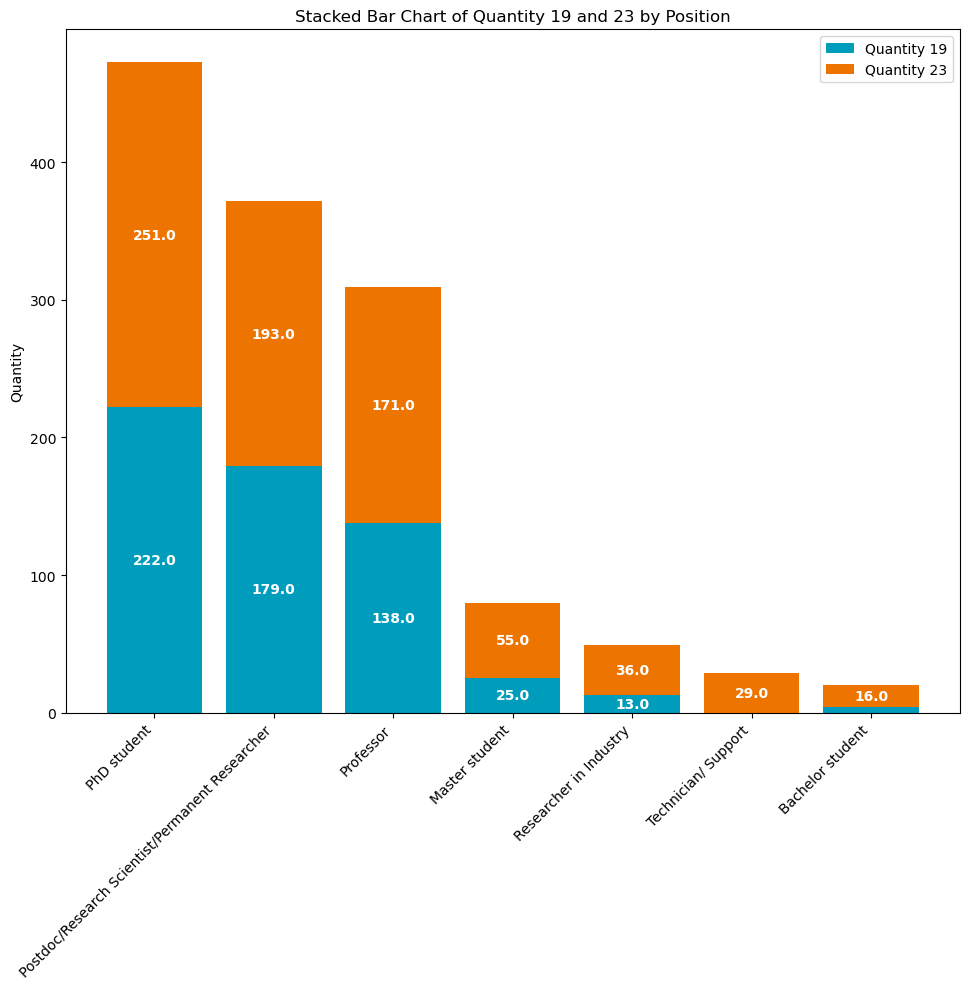

In [27]:
# Daten filtern (mindestens eine der beiden Quantitäten ist größer als 10)
df_filtered_position = df_sorted_position[(df_sorted_position['quantity_19'] > 10) | (df_sorted_position['quantity_23'] > 10)]

# Daten vorbereiten
positions = df_filtered_position['position']
quantity_19 = df_filtered_position['quantity_19']
quantity_23 = df_filtered_position['quantity_23']

# Balkendiagramm plotten
fig, ax = plt.subplots(figsize=(10, 10))

# Gestapelte Balken erzeugen
bottom_bars = ax.bar(positions, quantity_19, label='Quantity 19', color=petrol_rgb)
top_bars = ax.bar(positions, quantity_23, bottom=quantity_19, label='Quantity 23', color=orange_rgb)

# Absolutwerte in die Balken schreiben (quantity_19)
for i, (q19, q23) in enumerate(zip(quantity_19, quantity_23)):
    if q19 > 10:
        ax.text(i, q19 / 2, f'{q19}', ha='center', va='center', fontweight='bold', color='white')

# Absolutwerte in die Balken schreiben (quantity_23)
for i, (q19, q23) in enumerate(zip(quantity_19, quantity_23)):
    total_height = q19 + q23
    if q23 > 10:
        ax.text(i, total_height - q23 / 2, f'{q23}', ha='center', va='center', fontweight='bold', color='white')

# Achsenbeschriftungen und Titel
ax.set_ylabel('Quantity')
ax.set_title('Stacked Bar Chart of Quantity 19 and 23 by Position')
ax.set_xticks(np.arange(len(positions)))
ax.set_xticklabels(positions, rotation=45, ha="right")
ax.legend()

# Anzeigen
plt.tight_layout()
plt.show()

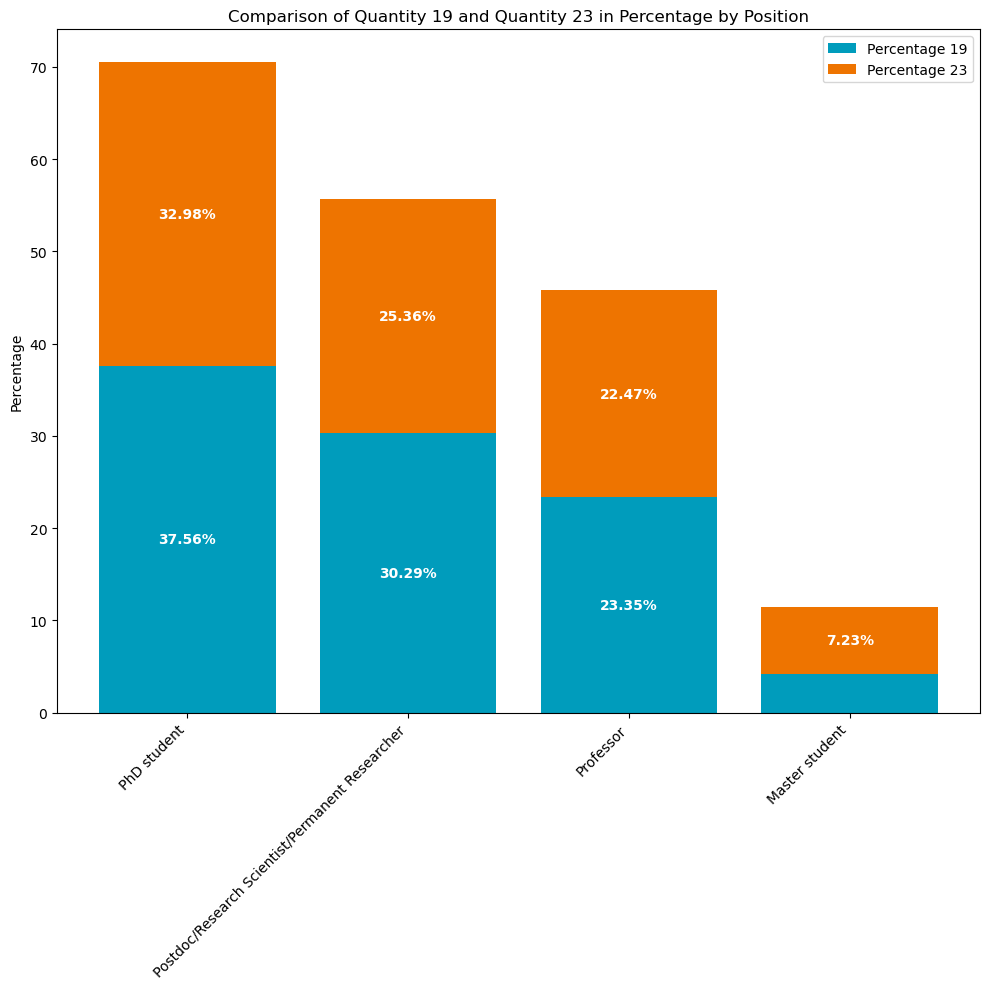

In [28]:
# Daten filtern (mindestens eine der beiden Quantitäten ist größer als 10)
df_filtered_position = df_sorted_position[(df_sorted_position['percentage_19'] > 7) | (df_sorted_position['percentage_23'] > 7)]

# Daten vorbereiten
positions = df_filtered_position['position']
percentage_19 = df_filtered_position['percentage_19']
percentage_23 = df_filtered_position['percentage_23']

# Balkendiagramm plotten
fig, ax = plt.subplots(figsize=(10, 10))

# Gestapelte Balken erzeugen
bottom_bars = ax.bar(positions, percentage_19, label='Percentage 19', color=petrol_rgb)
top_bars = ax.bar(positions, percentage_23, bottom=percentage_19, label='Percentage 23', color=orange_rgb)

# Prozentuale Werte in die Balken schreiben (percentage_19)
for i, (p19, p23) in enumerate(zip(percentage_19, percentage_23)):
    if p19 > 7:
        ax.text(i, p19 / 2, f'{p19:.2f}%', ha='center', va='center', fontweight='bold', color='white')

# Prozentuale Werte in die Balken schreiben (percentage_23)
for i, (p19, p23) in enumerate(zip(percentage_19, percentage_23)):
    total_height = p19 + p23
    if p23 > 7:
        ax.text(i, total_height - p23 / 2, f'{p23:.2f}%', ha='center', va='center', fontweight='bold', color='white')

# Achsenbeschriftungen und Titel
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Quantity 19 and Quantity 23 in Percentage by Position')
ax.set_xticks(np.arange(len(positions)))
ax.set_xticklabels(positions, rotation=45, ha="right")
ax.legend()


plt.tight_layout()
plt.show()

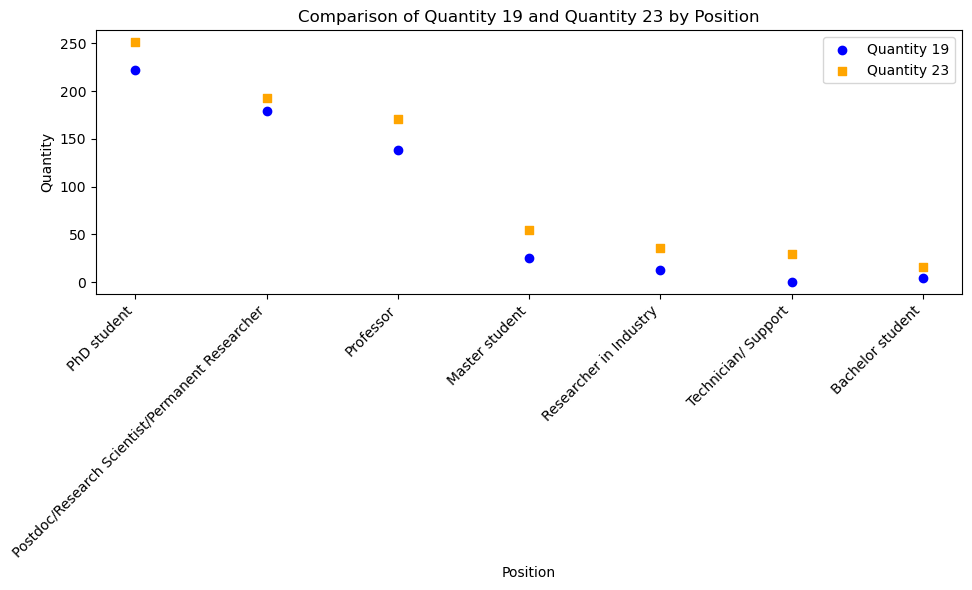

In [29]:
import matplotlib.pyplot as plt

# Daten filtern (mindestens eine der beiden Quantitäten ist größer als 10)
df_filtered_position = df_sorted_position[(df_sorted_position['quantity_19'] > 10) | (df_sorted_position['quantity_23'] > 10)]

# Daten vorbereiten
positions = df_filtered_position['position']
quantity_19 = df_filtered_position['quantity_19']
quantity_23 = df_filtered_position['quantity_23']

# Streudiagramm erstellen
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(positions, quantity_19, label='Quantity 19', color='blue', marker='o')
ax.scatter(positions, quantity_23, label='Quantity 23', color='orange', marker='s')

# Beschriftungen, Achsen und Titel
ax.set_xlabel('Position')
ax.set_ylabel('Quantity')
ax.set_title('Comparison of Quantity 19 and Quantity 23 by Position')
ax.set_xticks(positions)
ax.set_xticklabels(positions, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()